Dataset Shape: (15509, 10)

First 5 Rows:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2    

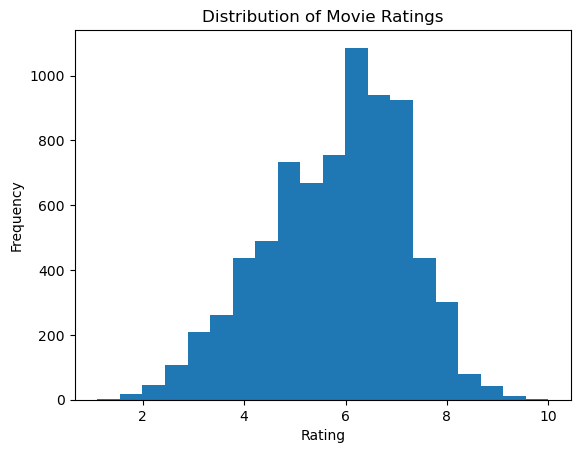

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.sparse import hstack



df = pd.read_csv("IMDb Movies India(Task_2).csv", encoding="latin1")

print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())



# Select important columns
df = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Rating', 'Votes']]

# Remove missing values
df.dropna(inplace=True)

# Convert Rating to numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Clean Votes column (remove commas)
df['Votes'] = df['Votes'].str.replace(',', '')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Drop rows with invalid values
df.dropna(inplace=True)

print("\nCleaned Dataset Shape:", df.shape)



# Combine text features into one column
df['Combined_Features'] = (
    df['Genre'] + " " +
    df['Director'] + " " +
    df['Actor 1'] + " " +
    df['Actor 2'] + " " +
    df['Actor 3']
)

# Convert text to TF-IDF matrix
tfidf = TfidfVectorizer(max_features=5000)
X_text = tfidf.fit_transform(df['Combined_Features'])

# Add numeric feature (Votes)
X_votes = df[['Votes']].values

# Combine sparse text matrix with numeric feature
X = hstack([X_text, X_votes])

# Target variable
y = df['Rating']



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)



y_pred = model.predict(X_test)



mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n===== Model Performance =====")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)



plt.figure()
plt.hist(df['Rating'], bins=20)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


